<a href="https://colab.research.google.com/github/njocimar28/Dados-abertos-CEAPS/blob/main/An%C3%A1lise_de_dados_CEAPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados Abertos - CEAPS Senado 2019 à 2022**

#### Cotas para Exercício da Atividade Parlamentar dos Senadores (CEAPS)
#### Fonte: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps

## Tratamento dos dados

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

In [236]:
urls =['/content/despesa_ceaps_2019 1.csv',
       '/content/despesa_ceaps_2020 1.csv',
       '/content/despesa_ceaps_2021 1.csv',
       '/content/despesa_ceaps_2022 1.csv'
]

In [237]:
dados = pd.DataFrame()

In [238]:
for url in urls:
  df = pd.read_csv(url, encoding='utf-8', sep=';')
  dados = pd.concat([df,dados], ignore_index=True)

In [239]:
dados.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616


In [240]:
dados.shape[0]

69333

In [241]:
dados.dtypes

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DOCUMENTO            object
DATA                 object
DETALHAMENTO         object
VALOR_REEMBOLSADO    object
COD_DOCUMENTO         int64
dtype: object

In [242]:
# Verificando valores nulos em cada coluna e contando
valores_nulos_por_coluna = dados.isnull().sum()

print(valores_nulos_por_coluna)

ANO                      0
MES                      0
SENADOR                  0
TIPO_DESPESA             0
CNPJ_CPF                 0
FORNECEDOR               0
DOCUMENTO             2963
DATA                     0
DETALHAMENTO         30750
VALOR_REEMBOLSADO        0
COD_DOCUMENTO            0
dtype: int64


In [243]:
# Salvando o DataFrame
dados.to_csv("dados_ceaps.csv", sep=';', index=False, encoding='utf-8')

## Breve análise dos dados

In [244]:
# Converter a coluna 'VALOR_REEMBOLSADO' para tipo numérico
dados['VALOR_REEMBOLSADO'] = pd.to_numeric(dados['VALOR_REEMBOLSADO'].str.replace(',', '.'), errors='coerce')

# Agrupar os dados por senador e somar os valores reembolsados
ranking_despesas_senador = dados.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenar o DataFrame em ordem decrescente de despesas
ranking_despesas_senador = ranking_despesas_senador.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

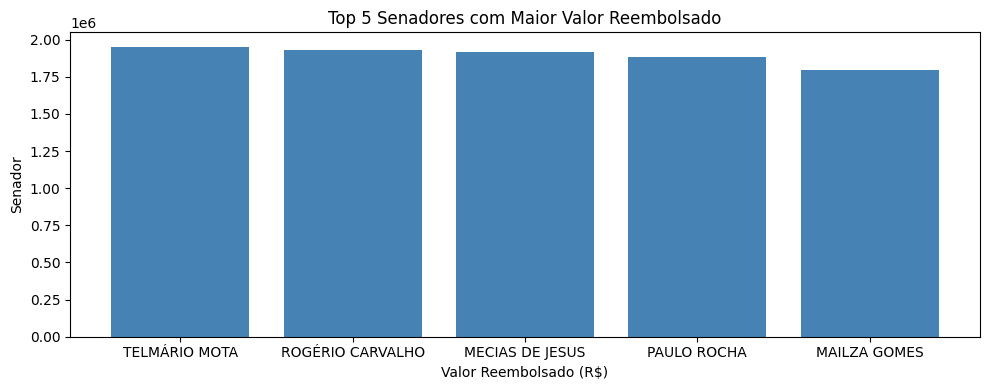

In [278]:
top_5 = ranking_despesas_senador.head(5)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(top_5['SENADOR'], top_5['VALOR_REEMBOLSADO'], color='#4682B4')
plt.xlabel('Valor Reembolsado (R$)')
plt.ylabel('Senador')
plt.title('Top 5 Senadores com Maior Valor Reembolsado')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [246]:
ranking_tipo_despesas = dados.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().reset_index()

ranking_tipo_despesas = ranking_tipo_despesas.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

<ipython-input-277-c6c90aa8439e>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


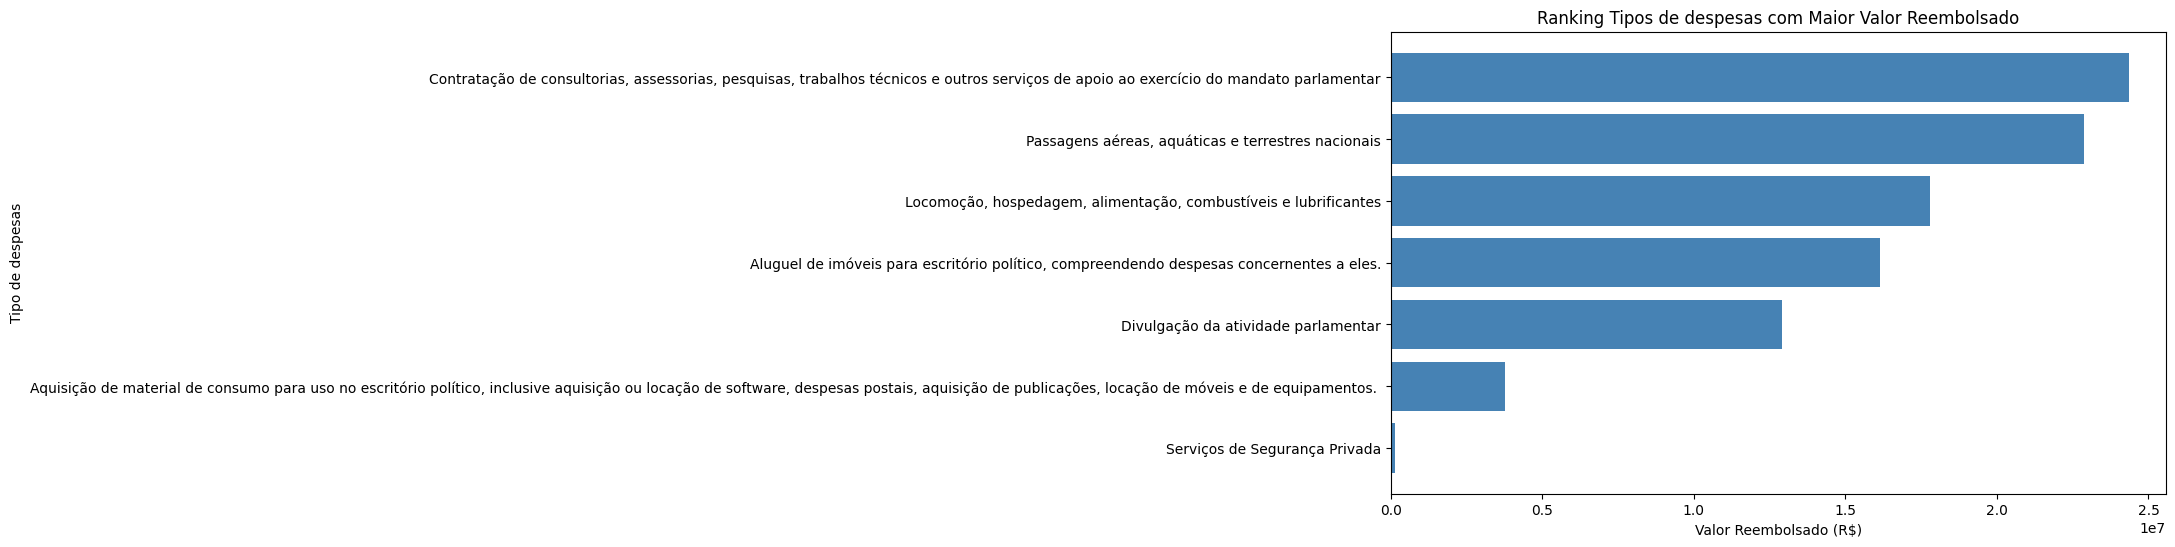

In [277]:
top_7_despesas = ranking_tipo_despesas

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_7_despesas['TIPO_DESPESA'], top_7_despesas['VALOR_REEMBOLSADO'], color='#4682B4')
plt.xlabel('Valor Reembolsado (R$)')
plt.ylabel('Tipo de despesas')
plt.title('Ranking Tipos de despesas com Maior Valor Reembolsado')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [265]:
ranking_fornecedor = dados.groupby('FORNECEDOR')['VALOR_REEMBOLSADO'].sum().reset_index()
ranking_fornecedor = ranking_fornecedor.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

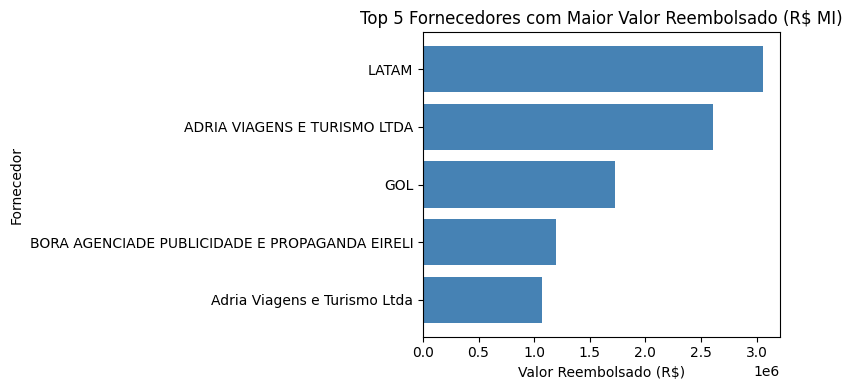

In [275]:
top_5_fornecedores = ranking_fornecedor.nlargest(5, 'VALOR_REEMBOLSADO')
top_5_fornecedores = top_5_fornecedores.sort_values(by='VALOR_REEMBOLSADO', ascending=True)

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(8, 4))
plt.barh(top_5_fornecedores['FORNECEDOR'], top_5_fornecedores['VALOR_REEMBOLSADO'], color='#4682B4')
plt.xlabel('Valor Reembolsado (R$)')
plt.ylabel('Fornecedor')
plt.title('Top 5 Fornecedores com Maior Valor Reembolsado (R$ MI)')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## **Versão Power BI** (interativo)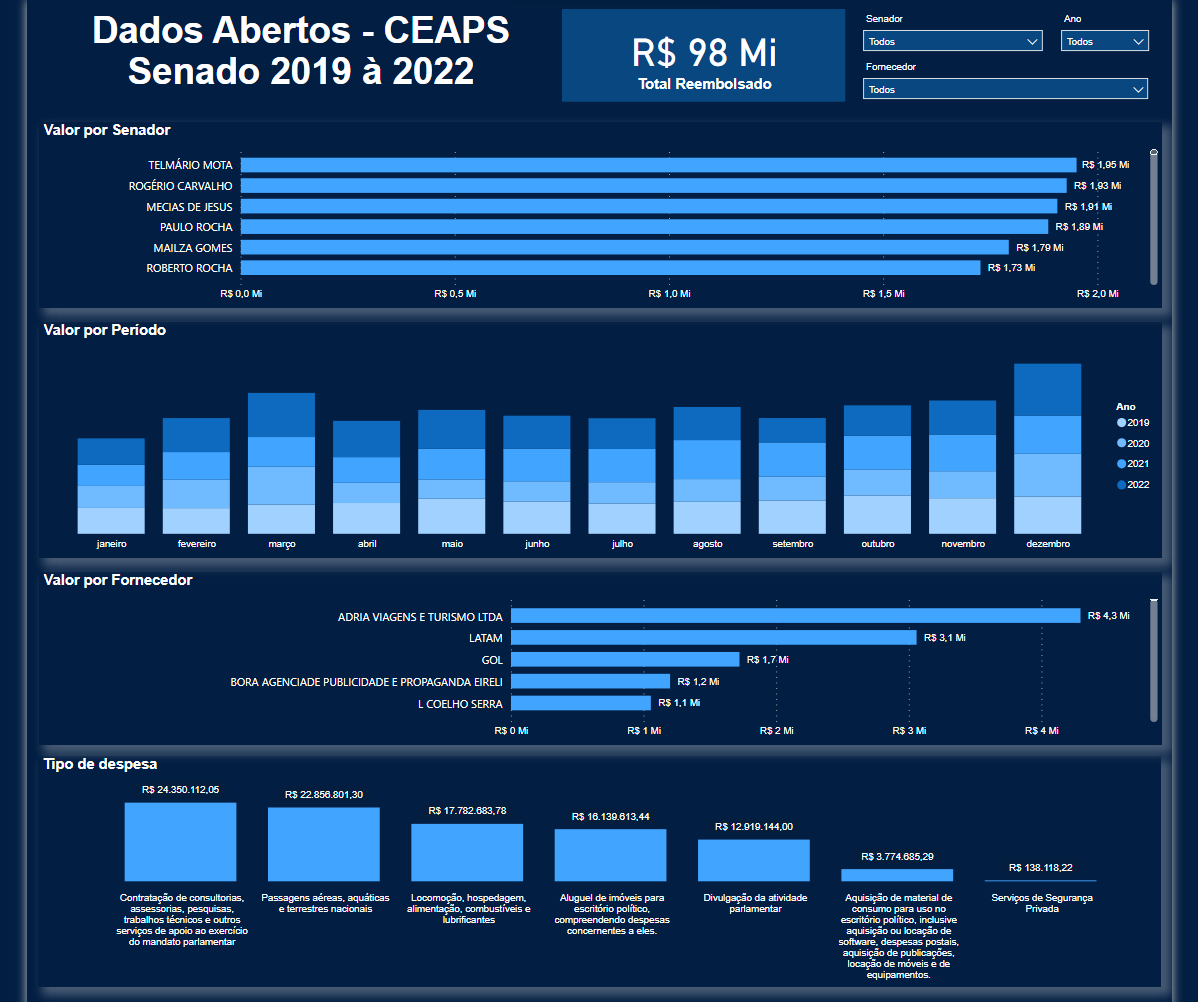

#### Link: https://app.powerbi.com/view?r=eyJrIjoiMTcxZmE5NTgtYTYwZS00YTUwLWI0MDEtNTRmYjY1NzgwNmI0IiwidCI6IjA3ZTQzMGE0LTk3ZmEtNDQ3Yy1hZmI4LWY3MWYxOTQzNWE3ZCJ9